<a href="https://colab.research.google.com/github/kristianJW54/ML_Foundations/blob/main/ML_Theory_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Theory Continued


---



#### Using Multiple Features

Using multiple linear regression we will look at how to handle multiple features in machine learning

multiple linear regression is as follows:

$ f_w,_b(x) = wx_1 + wx_2 + wx_3 ... + wx_n + b $

where $x_j$ = the index of the feature and $x^{(i)}$ = the index row of the feature vector and $w$ is the coefficient/weight

So for example: If $x_1$ was the blood pressure of a patient and $x_2$ was the weight of a patient and finally b was the base heart rate of a patient without measuring any of the features.

We could say that if the coefficient $w$ for $x_1$ was 1, that the base heart rate would be increased by 1 multiplied by the features value. This would be summed across the features and their weights

**Re-writing the formula**

Because we are dealing with vectors and the multiplication of vectors (dot product) we can simplify the formula:

$w$ = [$w_1, w_2, w_3...w_n$]

b = b

$4x$ = [$x_1, x_2, x_3,...x_n$]

**Simplified formula:**

$f_w,_b(x) = w · x + b$

#### Vectorisation

Using vectors for our machine learning algorithms and models will make our process faster and computationally more efficient

This will also be useful for when training on GPU's with more complex models.

In [ ]:
"""
To take the vectors:

w = [w1, w2, w3...]
b = number
x = [x1, x2, x3...]

We can use Numpy to create arrays for our variables to represent them as vectors

"""

import numpy as np

w = np.array([1, 2, 3])
b = 1
x = np.array([1, 2, 3])


"""
Using these vectors we can now perform a dot product calculation which will allow us to multiply and sum the vectors together without having to
manually type the formula

Finally we will add b

"""

f = np.dot(w,x) + b

**Vectorisation has two distinct benefits**

1) It makes the code shorted :)

2) It makes the code run faset :) :)

In the example of gradient descent, vectorisation can improve the efficiency of calculating the weights/parameters

Here we will look at an example of a multiple linear regression algorithm with 5 features

$w = [w_1, w_2, w_3, w_4, w_5]$

We then calculate the partial derivatives of these

$d = [d_1, d_2, d_3, d_4, d_5]$

In the first example we will see without vectorisation:

In [ ]:
w = [1.2, 2.3, 3.1, 2.9, 1.8]
d = [0.2, 0.4, 0.6, 0.5, 0.3]

# Without vectorisation

for i in range(len(w)):
  w[i] = w[i] - 0.1 * d[i]

print(w)

[1.18, 2.26, 3.04, 2.85, 1.77]


With vectorisation:

In [ ]:
import numpy as np

w = np.array([1.2, 2.3, 3.1, 2.9, 1.8])
d = np.array([0.2, 0.4, 0.6, 0.5, 0.3])

w = w - 0.1 * d

print(w)

[1.18 2.26 3.04 2.85 1.77]


#### Matrices

Matrices, are two dimensional arrays. The elements of a matrix are all of the same type. In notation, matrices are denoted with capitol, bold letter such as $\mathbf{X}$. $m$ is often the number of rows and $n$ the number of columns. The elements of a matrix can be referenced with a two dimensional index. In math settings, numbers in the index typically run from 1 to n.  

The same functions that created 1-D vectors will create 2-D or n-D arrays. Here are some examples

Below, the shape tuple is provided to achieve a 2-D result. Notice how NumPy uses brackets to denote each dimension. Notice further than NumPy, when printing, will print one row per line.


In [ ]:
import numpy as np

a = np.zeros((1, 5))
print(f"a shape = {a.shape}, a = {a}")

a = np.zeros((2, 1))
print(f"a shape = {a.shape}, a = {a}")

a = np.random.random_sample((1, 1))
print(f"a shape = {a.shape}, a = {a}")

a shape = (1, 5), a = [[0. 0. 0. 0. 0.]]
a shape = (2, 1), a = [[0.]
 [0.]]
a shape = (1, 1), a = [[0.65902684]]


One can also manually specify data. Dimensions are specified with additional brackets matching the format in the printing above.

In [ ]:
# NumPy routines which allocate memory and fill with user specified values
a = np.array([[5], [4], [3]]);   print(f" a shape = {a.shape}, np.array: a = {a}")
a = np.array([[5],   # One can also
              [4],   # separate values
              [3]]); #into separate rows
print(f" a shape = {a.shape}, np.array: a = {a}")

 a shape = (3, 1), np.array: a = [[5]
 [4]
 [3]]
 a shape = (3, 1), np.array: a = [[5]
 [4]
 [3]]


In [ ]:
header = ["Run", "Distance", "Time"]

data = [[0,5,10],[1,10,30],[1,10,28],[0,5,20]]

# Convert data to a NumPy array
data_array = np.array(data)

# Concatenate header with data array
matrix = np.vstack([header, data_array])

print(matrix)

[['Run' 'Distance' 'Time']
 ['0' '5' '10']
 ['1' '10' '30']
 ['1' '10' '28']
 ['0' '5' '20']]


In [ ]:
# Create a 1D array with 12 elements
arr = np.arange(12)

# Reshape the array into a 3x4 matrix
reshaped_arr = arr.reshape(3, 4)

print("Original Array:")
print(arr)
print("Reshaped Array:")
print(reshaped_arr)

Original Array:
[ 0  1  2  3  4  5  6  7  8  9 10 11]
Reshaped Array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


#### Gradient Descent With Multiple Variables

Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

#### Feature Scaling

In feature scaling we look to bring values between a smaller range which can help when training models. Features that are vastly different in terms of scale can have a big impact on our models. If one feature is a vector with the values in the range of 1-5 and the second feature with a vector in the range of 10000-200000 then the large difference in scale will cause problems when trying to train our gradient descent algorithm

In order to solve this, it is helpful to reduce these values into a more suited range where all features are either between 0,1 or -1,1.


**Mean Normalisation**

For example - Mean Normalisation scales features around 0 so between -1 and 1

It does this by taking the mean (average) and dividing that by the difference between the min and the max

[86 43 87 16 35 46 45 20 27 16 64 78 85 21 46 15 37 75 46 51 90]
[75995 47342 26351  5849 31283 77840 63151 31830 20717 55902 81259 10545
 85605 69807 32599 90040 82010 58062 99204 25398 56517]

x1 Scaled: 
[ 0.49333333 -0.08        0.50666667 -0.44       -0.18666667 -0.04
 -0.05333333 -0.38666667 -0.29333333 -0.44        0.2         0.38666667
  0.48       -0.37333333 -0.04       -0.45333333 -0.16        0.34666667
 -0.04        0.02666667  0.54666667] 

x2 Scaled: 
[ 0.23902053 -0.06790464 -0.29275602 -0.51236932 -0.23992543  0.2587838
  0.10143819 -0.23406607 -0.35310629  0.02378836  0.29540744 -0.46206671
  0.34196092  0.17273592 -0.2258287   0.38946775  0.303452    0.04692584
  0.48763068 -0.30296436  0.03037611]


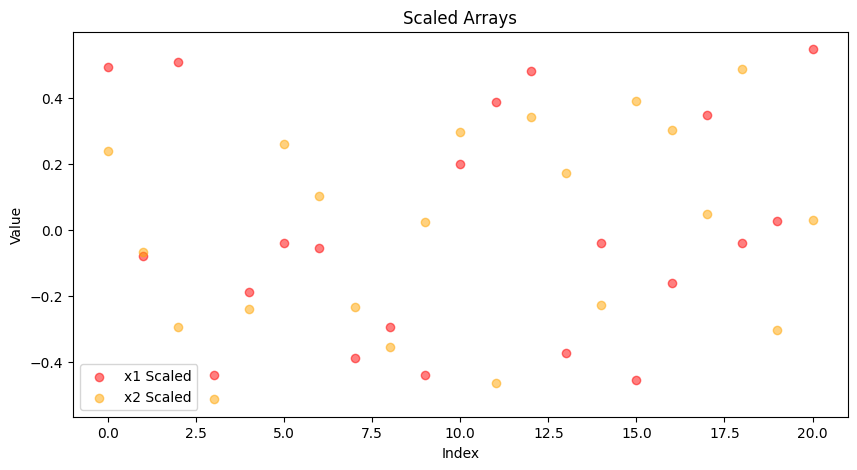

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def randlist(lower, higher):
  lst = []
  for i in range(21):
    lst.append(np.random.randint(lower,higher))
  return lst


x1 = np.array(randlist(10,100))
print(x1)

x2 = np.array(randlist(5000,100000))
print(x2)


# Mean Normalisation

def scale_feature(feature):

  m1 = np.mean(feature)
  max1 = np.max(feature)
  min1 = np.min(feature)

  diff1 = max1 - min1

  scaled = (feature - m1) / diff1

  return scaled

print(f"\nx1 Scaled: \n{scale_feature(x1)} \n\nx2 Scaled: \n{scale_feature(x2)}")


plt.figure(figsize=(10, 5))

# Scaled arrays
x1_scaled = scale_feature(x1)
x2_scaled = scale_feature(x2)

plt.scatter(range(len(x1_scaled)), x1_scaled, color='red', alpha=0.5, label='x1 Scaled')
plt.scatter(range(len(x2_scaled)), x2_scaled, color='orange', alpha=0.5, label='x2 Scaled')

plt.legend()
plt.title('Scaled Arrays')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()



**Z-Score Normalisation**

Z-score normalisation takes the feature and subtracts it from the mean of the features before dividing it by the standard deviation

x1 Zscore Normalised: 
[ 1.46484403 -0.23754227  1.50443441 -1.30648251 -0.55426531 -0.11877114
 -0.15836152 -1.14812099 -0.87098834 -1.30648251  0.59385569  1.14812099
  1.42525365 -1.10853062 -0.11877114 -1.34607289 -0.47508455  1.02934986
 -0.11877114  0.07918076  1.62320554] 

x2 Zcore Normalised: 
[ 0.81644707 -0.23194889 -0.9999969  -1.7501527  -0.819538    0.88395451
  0.34649287 -0.7995236  -1.20614156  0.08125634  1.00905365 -1.5783289
  1.16807117  0.59003189 -0.77138636  1.33034514  1.03653229  0.16028943
  1.66565036 -1.0348666   0.10375882]


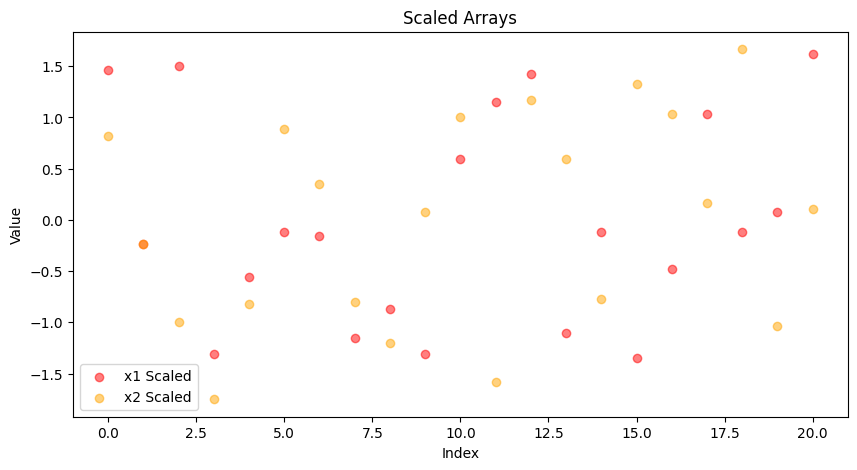

In [ ]:

def zscore_norm(feature):

  m1 = np.mean(feature)
  st1 = np.std(feature)

  return (feature - m1) / st1


print(f"x1 Zscore Normalised: \n{zscore_norm(x1)} \n\nx2 Zcore Normalised: \n{zscore_norm(x2)}")

plt.figure(figsize=(10, 5))

# Scaled arrays
x1_znorm = zscore_norm(x1)
x2_znorm = zscore_norm(x2)

plt.scatter(range(len(x1_znorm)), x1_znorm, color='red', alpha=0.5, label='x1 Scaled')
plt.scatter(range(len(x2_znorm)), x2_znorm, color='orange', alpha=0.5, label='x2 Scaled')

plt.legend()
plt.title('Scaled Arrays')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

